In [10]:
from data_analysis.distribution import plot_distribution, plot_freq_sub
from data_analysis.load_data import get_list, process
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
cat = ['all','film-animation', 'autos-vehicles', 'music', 'pets-animals', 'sports', 'travel-events', 'gaming',
'people-blogs', 'comedy', 'entertainment', 'news-politics', 'howto-style', 'education', 'science-technology', 'shows', 'nonprofits-activism']


In [27]:
def reg(df, yup = 0.4 *1e7, xup = 200):
    x = df[['freq_m']]
    y = df['subscribers']
    # remove outstanding points
    y = y.clip(upper = yup)
    x = x.clip(upper = xup)
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    return model


In [30]:
# save as dataframe for each
corr = []
coef = []
pvalue = []
avg_freq = []
for cls in cat:
    cat_url = f'https://us.youtubers.me/global/{cls}/top-1000-most-subscribed-youtube-channels'
    cat_df = get_list(cat_url)
    cat_df = process(cat_df)
    avg = cat_df['freq_m'].mean()
    globals()[f'{cls}_df'] = cat_df
    model = reg(cat_df)
    coefficient = model.params['freq_m']
    p_value = model.pvalues['freq_m']
    correlation_coefficient = cat_df['freq_m'].corr(cat_df['subscribers'])
    corr.append(correlation_coefficient)
    coef.append(coefficient)
    pvalue.append(p_value)
    avg_freq.append(avg)
    print(cls, "CORRELATION: ", correlation_coefficient, "COEFFICIENT:", coefficient, "P-VALUE:", p_value)

all CORRELATION:  0.03579960862048384 COEFFICIENT: 4.433786671143025e-12 P-VALUE: 0.024146473935783494
film-animation CORRELATION:  0.034015269833378596 COEFFICIENT: 110.47357800789854 P-VALUE: 0.8949850366248073
autos-vehicles CORRELATION:  0.06210614891013396 COEFFICIENT: 3230.5035587620728 P-VALUE: 0.01920881443172292
music CORRELATION:  0.14883175483920327 COEFFICIENT: 91.2945121072787 P-VALUE: 0.12449595493761462
pets-animals CORRELATION:  0.07290498585524113 COEFFICIENT: 4970.744841090151 P-VALUE: 0.002558497651809991
sports CORRELATION:  0.1328845409146501 COEFFICIENT: 2898.734802595321 P-VALUE: 2.7173026773417415e-05
travel-events CORRELATION:  0.045652940293815704 COEFFICIENT: 3410.1564418706594 P-VALUE: 0.005747622215207005
gaming CORRELATION:  0.07663897277041387 COEFFICIENT: 260.25284780318543 P-VALUE: 0.65860775480747
people-blogs CORRELATION:  0.09685410968383071 COEFFICIENT: -3.637978807091713e-12 P-VALUE: 3.1168254224090077e-96
comedy CORRELATION:  -0.01750111449057978 

In [32]:
cat_data = {
    'Category': cat,
    'Correlation': corr,
    'Coefficient': coef,
    'P-value': pvalue,
    'Average frequency': avg_freq,
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(cat_data)
df[['Correlation', 'Coefficient', 'P-value','Average frequency']] = df[['Correlation', 'Coefficient', 'P-value','Average frequency']].apply(lambda x: round(x, 3))

In [33]:
df

,Category,Correlation,Coefficient,P-value,Average frequency
0,all,0.036,0.000,0.024,77.502
1,film-animation,0.034,110.474,0.895,18.775
2,autos-vehicles,0.062,3230.504,0.019,10.323
3,music,0.149,91.295,0.124,12.663
4,pets-animals,0.073,4970.745,0.003,9.702
5,sports,0.133,2898.735,0.000,36.531
6,travel-events,0.046,3410.156,0.006,11.651
7,gaming,0.077,260.253,0.659,18.444
8,people-blogs,0.097,-0.000,0.000,40.859
9,comedy,-0.018,2233.434,0.041,17.343


In [38]:
# plot
def plot_reg(cat, df, yup = 0.4 *1e7, xup = 200):
    x = df[['freq_m']]
    y = df['subscribers']
    # remove outstanding points
    y = y.clip(upper = yup)
    x = x.clip(upper = xup)
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()

    plt.scatter(x, y, label='Data')
    plt.plot(x, model.predict(X), color='red', label='Linear Regression')
    plt.xlabel('Frequency (freq_m)')
    plt.ylabel('Subscribers')
    plt.title(f'Linear Regression: {cat}')
    plt.legend()
    plt.show()

In [ ]:
cat = ['all','film-animation', 'autos-vehicles', 'music', 'pets-animals', 'sports', 'travel-events', 'gaming',
'people-blogs', 'comedy', 'entertainment', 'news-politics', 'howto-style', 'education', 'science-technology', 'shows', 'nonprofits-activism']

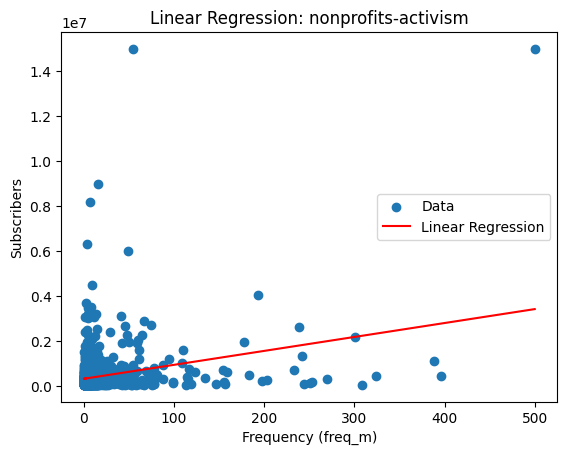

In [46]:
cat = 'nonprofits-activism'
desired_df = globals()[f'{cls}_df']
plot_reg(cat, desired_df, yup = 1.5 *1e7, xup = 500)